This notebook was created by Lauren Chronister on 2022-04-07 and edited by Pat Lyon on 2022-09-22 for scoring batches of clips from the nfwf v1.2 model predicting on the dfrb2020 and appl2021 dataset following modifications to a previous version created for top-down listening in the ECCO5 territory settlement project.

Only values in the following "box" may be edited for this notebook to function properly.
---
Both clips_folder and scores_csv are relative paths. They will point to things in your working directory which you will set by specifying working_directory. Keep your folder containing your clips and your scores csv in this same working directory. Enter the name of the column containing your scores (alpha code for your species) as the score_column variable.

Run each "box" in order by selecting the play button at the top of this notebook (looks like a right-pointing triangle).

Annotations will be saved in a "_annotations.csv" file.

In [1]:
# Set file names and paths

working_directory = 'D:\\' # please paste the path to your working directory here 

clips_folder = '2022_FWPR7_Clips' # Folder containing subfolders of points filled with audio clips (e.g., GWWA_songs_Pat)

scores_csv = 'D:\\2022_FWPR7_Clips\\2023-01-15_2022FWPR7_top10persite\\BBCU\\top10scoring_clips_persite.csv' # csv file containing classifier scores, should be in your clips_folder

score_column = 'present' # Name of the column containing scores--this is the species you are annotating for (e.g., WOTH_song, CERW_song, etc.)

# As long as the notebook structure is the same, just go thorugh and run the next code 


# 11/28 renamed all card names to "point"

Do not edit anything below this line.
---

In [2]:
# Import modules
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.audio import Audio
import pandas as pd
from glob import glob
import IPython.display as ipd
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
os.chdir(working_directory)

if clips_folder[-1]!='/':
    clips_folder = clips_folder+'/'

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [25,10]

Accepted values for annotations are 0, 1, or u.
---
Mark "0" if the clip does not contain your species.
Mark "1" if the clip does contain your species.
Mark "u" if you are unsure whether the clip contains your species or not.

In [5]:
# Set some other variables
valid_annotations = ['0','1','u'] # Annotations that are accepted
annotation_to_stop_at = '' # Which annotation marks a site-day occupied?
# if you specify 1 above, when there is an annotation for a 1 for the point it will skip to the next point 

In [6]:
# Load and prepare csv file
try:
    scores = pd.read_csv(scores_csv.split('.')[0]+'_annotations.csv').set_index('clip')
    
except:
    scores = pd.read_csv(scores_csv).set_index('clip')
    scores.sort_values(by=[score_column],ascending=False,inplace=True)
    #scores['point'] = [f.split('_')[0] for f in scores.index.tolist()]
    scores['annotation'] = ['not reviewed' for i in range(len(scores))]
    #scores['point'] = [np.nan for i in range(len(scores))]
    scores.to_csv(scores_csv.split('.')[0]+'_annotations.csv')
    
points = sorted(set(scores['point'].tolist()))

In [7]:
# Define function for loading clips and marking annotation
def load_clip_and_annotate(clip,scores_file,progress=None):
    """
    Function for loading specified clips, displaying them, and allowing the user to annotate the clip.
    
    Parameters
    clip: the clip name
    scores_file: the file containing classifier scores
    
    Returns
    scores_file: the file containing classifier scores, now annotated
    """
    
    audio = Audio.from_file(clip)
    ipd.display(clear=True)
    
    if progress is not None:
        print('%.1f'%progress+'% of moths in this set already completed.')
        
    print('Clip: '+clip)
    ipd.display(Spectrogram.from_audio(audio).bandpass(0,10000).plot())
    ipd.display(ipd.Audio(audio.samples,rate=audio.sample_rate,autoplay=True))
    valid = False
    
    while valid!=True:
        annotation = str(input('Enter annotation. Valid options are '+str(valid_annotations)+'.').strip())
        
        if annotation in valid_annotations:
            scores_file.at[clip,'annotation'] = annotation
            valid = True
            
        else:
            print('Not a valid annotation. Please try again.')
            
    flag = str(input('Flag this file? (y/n)'))
    
    if flag=='y':
        scores_file.at[clip,'flag'] = 1
        
    return scores_file

By running the following box, you will begin annotation.
---
You will see your progress at the top of the output. Below that is the name of the clip you are currently reviewing. Audio will play automatically. You will see the clip in the form of a spectrogram and play button and slider should you choose to listen to the clip again.

You will first be prompted to enter an annotation for the clip. Type the one-character annotation and press the enter key. If it is not one of the three accepted annotations, you will be prompted to re-enter it.

You will then be asked if you want to flag the clip you reviewed. Flag it for any reason (maybe there's an interesting species or you want to remember to look at it again later). Only entering exactly "y" will trigger the flag. Otherwise, simply press the enter key.

Upon completion of the annotation, the next clip will be automatically loaded and you will be prompted to begin the next annotation.

98.1% of moths in this set already completed.
Clip: D:\2022_FWPR7_Clips\2023-01-15_2022FWPR7_top10persite\BBCU\XSS-3\20220809_070000_595.0s-600.0s.wav


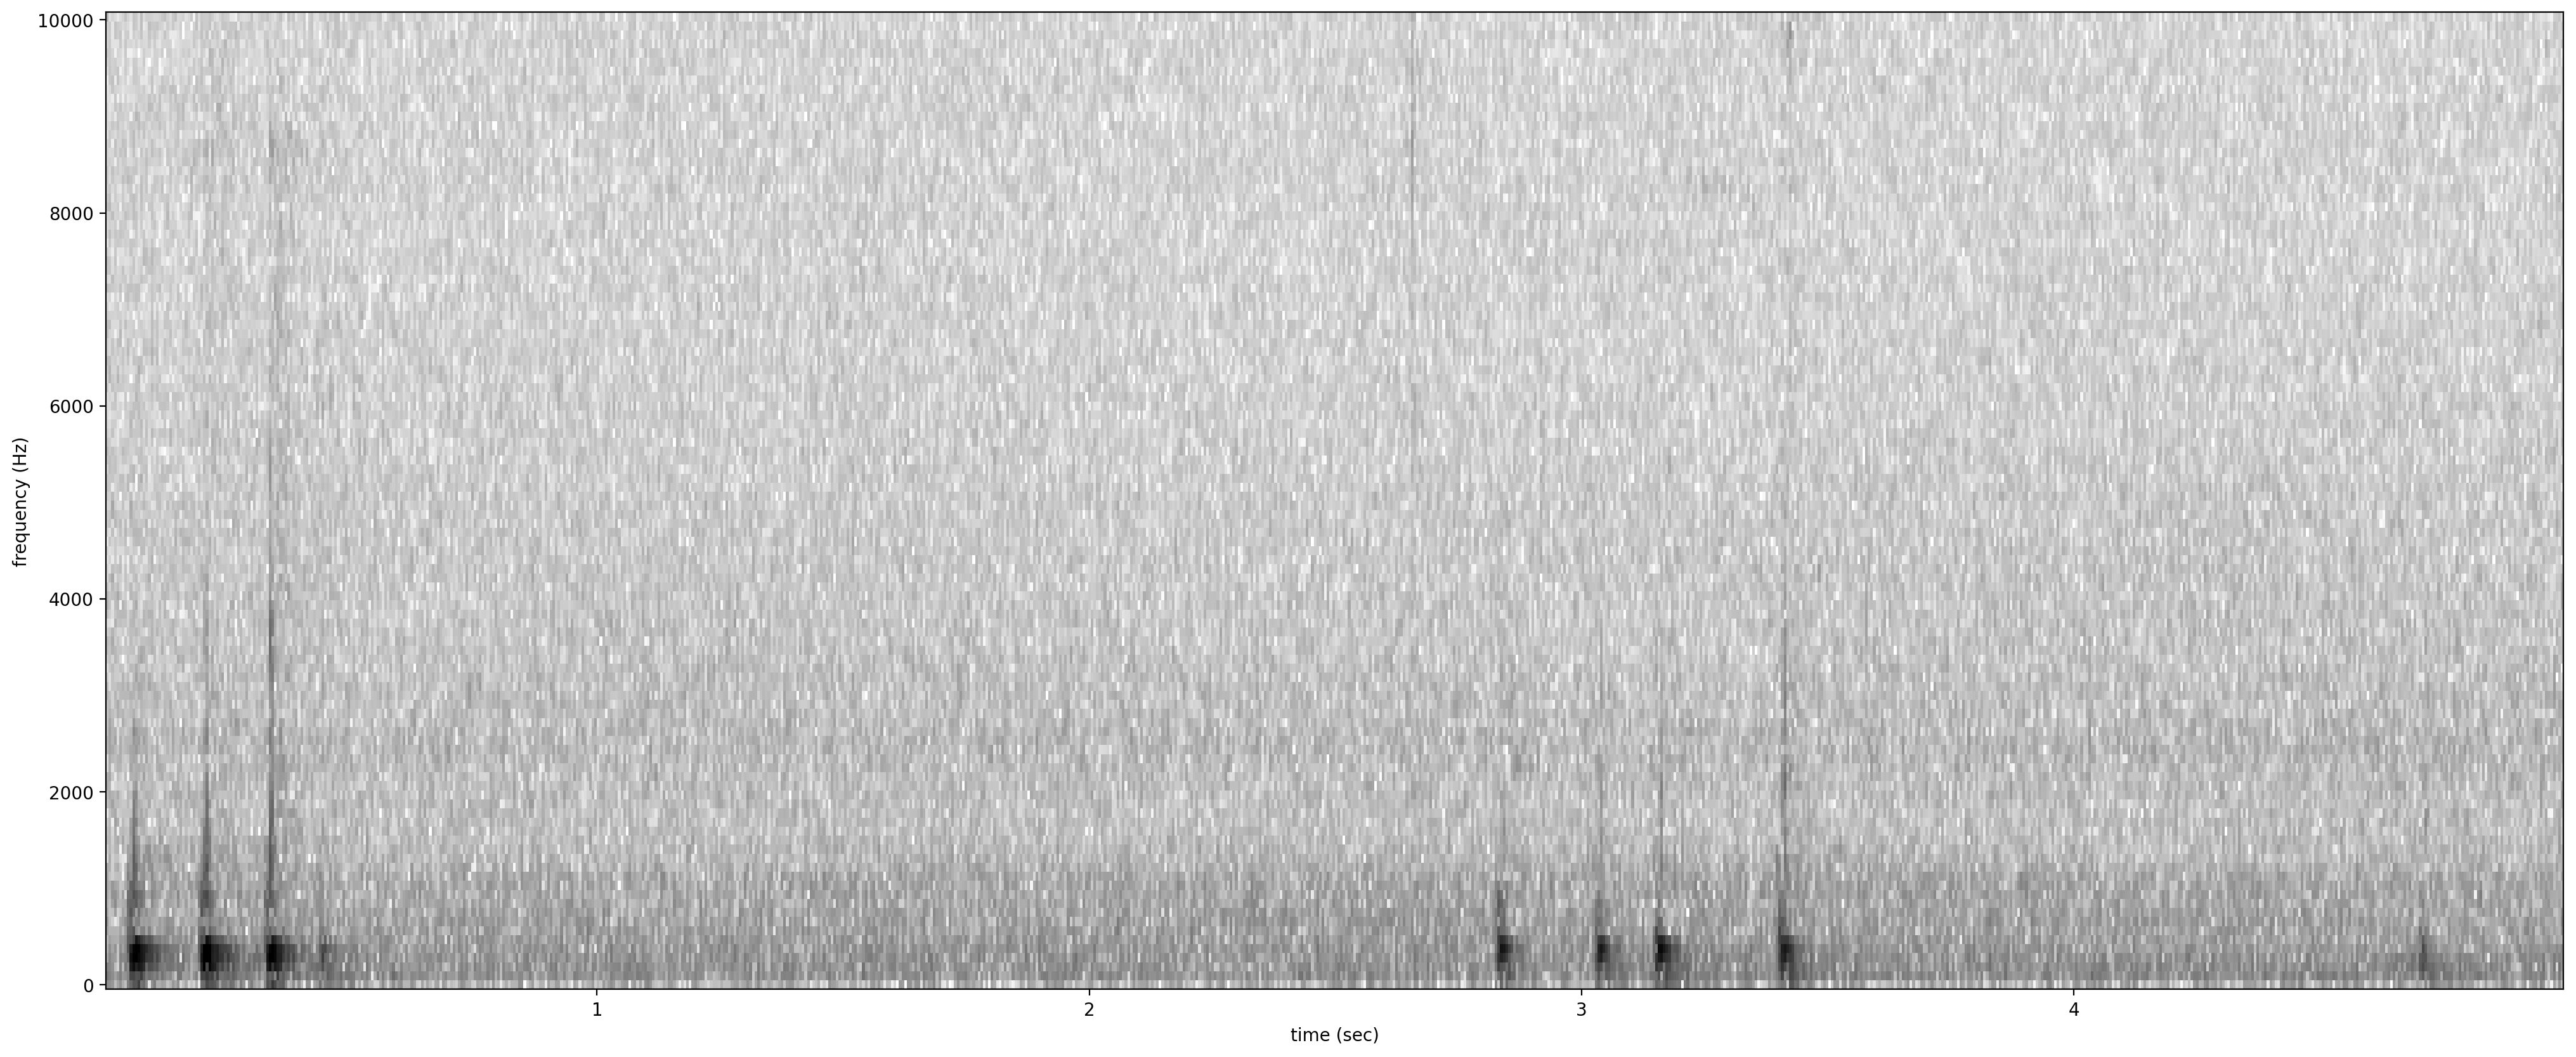

None

Enter annotation. Valid options are ['0', '1', 'u']. 0
Flag this file? (y/n) n


In [8]:
# 1/14: potentially edit this section so it shows the score for the file you pulled up?
for pt in points:
    num = points.index(pt)
    pt_scores = scores.loc[scores['point']==pt]
    
    for f in pt_scores.index.tolist():
        pt_scores = scores.loc[scores['point']==pt]
        
        if annotation_to_stop_at in pt_scores['annotation'].tolist():
            break
            
        elif pt_scores['annotation'].at[f]=='not reviewed':
            scores = load_clip_and_annotate(f,scores,progress=(num/len(points))*100)
            
    save_scores = scores.sort_values(by=['point',score_column],ascending=False)
    save_scores.to_csv(scores_csv.split('.')[0]+'_annotations.csv')

Use the following box to check how many clips you have reviewed.
---

In [9]:
                        reviewed = scores.loc[(scores['annotation']!='not reviewed')&(scores['annotation']!='already reviewed positive')]
print(str(len(reviewed))+'/'+str(len(scores))+' files reviewed in this set.')

530/530 files reviewed in this set.


Use the following boxes to review and edit annotations.
---
Edit the "review_annotation" variable to choose which annotations to review. Anything in the square brackets will be reviewed.

In [11]:
#review_annotations = [1,'u'] # Here's an example
review_annotations = ['u']

By running the following box, you will begin reviewing and editing the annotations.
---
Annotations will be saved to an "_annotations_v2.csv" file.

Clip: D:\2022_FWPR7_Clips\2023-01-15_2022FWPR7_top10persite\BBCU\AME-2\20220802_010000_1760.0s-1765.0s.wav


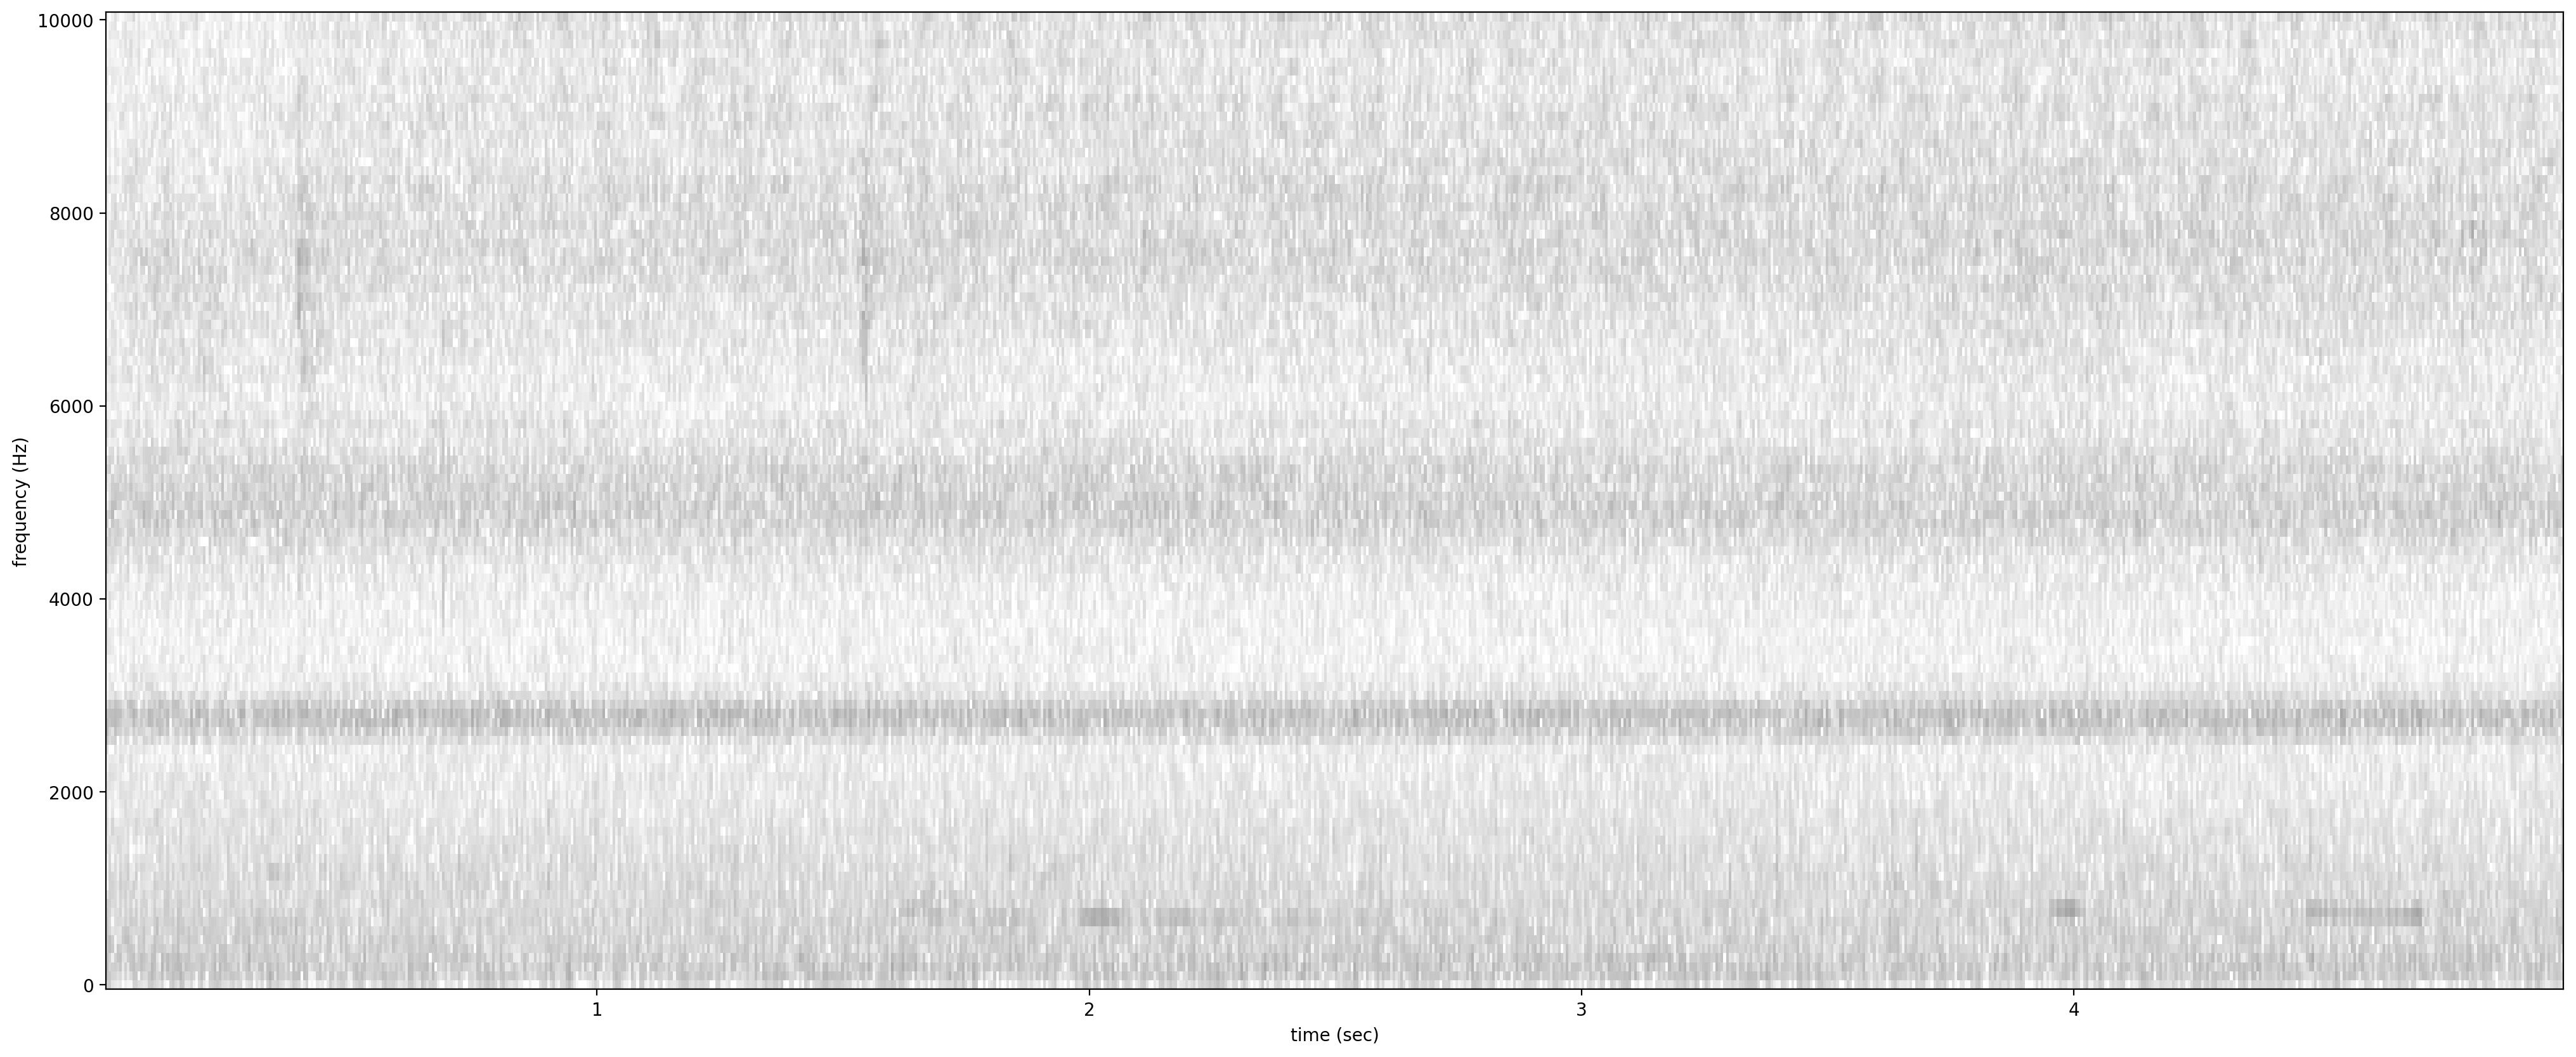

None

Enter annotation. Valid options are ['0', '1', 'u']. u
Flag this file? (y/n) y


In [12]:
# Load and prepare csv file
try:
    review_scores = pd.read_csv(scores_csv.split('.')[0]+'_annotations_v2.csv').set_index('clip')
    
except:
    review_scores = pd.read_csv(scores_csv.split('.')[0]+'_annotations.csv').set_index('clip')
    
for f in review_scores.index.tolist():
    
    if review_scores['annotation'].at[f] in review_annotations:
        
        load_clip_and_annotate(f,review_scores)
        save_scores = review_scores.sort_values(by=['point',score_column],ascending=False)
        save_scores.to_csv(scores_csv.split('.')[0]+'_annotations_v2.csv')
        